In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, hamming_loss, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import keras_tuner as kt

In [3]:
# Load and prepare the dataset
data_path = 'C:/Users/hp/Downloads/OneHotEncoded_WorkoutPlans.csv'
data = pd.read_csv(data_path)
data.rename(columns={'Unnamed: 0': 'Muscle_Groups'}, inplace=True)

# Data preprocessing
data['Muscle_Groups'] = data['Muscle_Groups'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['Muscle_Groups'])
X = data.drop('Muscle_Groups', axis=1)

In [ ]:
# Display basic information about the dataset
print("Initial data preview:")
print(data.head())
print("Data shape:", data.shape)
print("Missing values in each column:")
print(data.isnull().sum())
print("Distribution of Muscle Groups:")
print(data['Muscle_Groups'].value_counts())

Initial data preview:
           Muscle_Groups  MetaBurn Pike Push-Up  Dumbbell hang snatch  \
0        [Chest, Glutes]                      0                     0   
1  [Middle Back, Biceps]                      0                     0   
2     [Traps, Shoulders]                      0                     0   
3     [Adductors, Chest]                      0                     0   
4      [Lats, Adductors]                      0                     0   

   Pull-up - Gethin Variation  Front Plate Raise  Snatch Balance  \
0                           0                  0               0   
1                           0                  0               0   
2                           0                  1               0   
3                           0                  0               0   
4                           0                  0               0   

   One Half Locust  Neck-SMR  Drop Push  Medicine ball sprawl to chest press  \
0                0         0          0           

In [ ]:
# Setup training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the neural network
model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30


c:\Users\hp\Downloads\Flask\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 2s - 334ms/step - accuracy: 0.0867 - loss: 0.7630 - val_accuracy: 0.2955 - val_loss: 0.3206
Epoch 2/30
6/6 - 0s - 29ms/step - accuracy: 0.2081 - loss: 0.4278 - val_accuracy: 0.3864 - val_loss: 0.3173
Epoch 3/30
6/6 - 0s - 26ms/step - accuracy: 0.2601 - loss: 0.3410 - val_accuracy: 0.4318 - val_loss: 0.2711
Epoch 4/30
6/6 - 0s - 26ms/step - accuracy: 0.3815 - loss: 0.2512 - val_accuracy: 0.6591 - val_loss: 0.1990
Epoch 5/30
6/6 - 0s - 26ms/step - accuracy: 0.4855 - loss: 0.1749 - val_accuracy: 0.7045 - val_loss: 0.1555
Epoch 6/30
6/6 - 0s - 26ms/step - accuracy: 0.5145 - loss: 0.1567 - val_accuracy: 0.6818 - val_loss: 0.1293
Epoch 7/30
6/6 - 0s - 26ms/step - accuracy: 0.5491 - loss: 0.1296 - val_accuracy: 0.6364 - val_loss: 0.1137
Epoch 8/30
6/6 - 0s - 27ms/step - accuracy: 0.4855 - loss: 0.1216 - val_accuracy: 0.6136 - val_loss: 0.1076
Epoch 9/30
6/6 - 0s - 26ms/step - accuracy: 0.5087 - loss: 0.0789 - val_accuracy: 0.5909 - val_loss: 0.0999
Epoch 10/30
6/6 - 0s - 26ms/step - acc

In [ ]:
# Advanced model building and training
def build_advanced_model():
    model = Sequential([
        Dense(320, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(160, activation='relu'),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

advanced_model = build_advanced_model()
advanced_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)
test_loss, test_accuracy = advanced_model.evaluate(X_test, y_test)
print("Advanced Model Test Accuracy:", test_accuracy)

Epoch 1/50
6/6 - 2s - 301ms/step - accuracy: 0.0983 - loss: 0.5832 - val_accuracy: 0.2273 - val_loss: 0.3764
Epoch 2/50
6/6 - 0s - 22ms/step - accuracy: 0.3468 - loss: 0.2599 - val_accuracy: 0.5000 - val_loss: 0.2583
Epoch 3/50
6/6 - 0s - 23ms/step - accuracy: 0.4740 - loss: 0.1607 - val_accuracy: 0.6591 - val_loss: 0.1890
Epoch 4/50
6/6 - 0s - 21ms/step - accuracy: 0.6185 - loss: 0.0982 - val_accuracy: 0.7045 - val_loss: 0.1441
Epoch 5/50
6/6 - 0s - 21ms/step - accuracy: 0.5376 - loss: 0.0668 - val_accuracy: 0.7045 - val_loss: 0.1138
Epoch 6/50
6/6 - 0s - 24ms/step - accuracy: 0.5896 - loss: 0.0441 - val_accuracy: 0.6818 - val_loss: 0.0953
Epoch 7/50
6/6 - 0s - 23ms/step - accuracy: 0.5607 - loss: 0.0339 - val_accuracy: 0.7045 - val_loss: 0.0857
Epoch 8/50
6/6 - 0s - 23ms/step - accuracy: 0.6012 - loss: 0.0221 - val_accuracy: 0.7273 - val_loss: 0.0767
Epoch 9/50
6/6 - 0s - 23ms/step - accuracy: 0.5145 - loss: 0.0200 - val_accuracy: 0.7045 - val_loss: 0.0704
Epoch 10/50
6/6 - 0s - 23ms

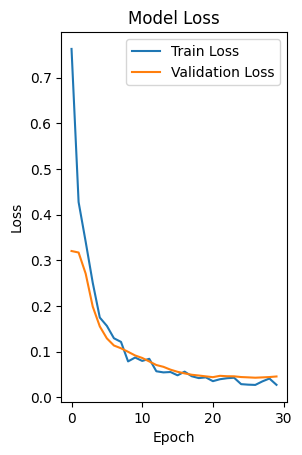

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Display the final evaluation
y_pred_probs = advanced_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
print("Advanced Model Classification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Advanced Model Classification Report:
              precision    recall  f1-score   support

  Abdominals       1.00      1.00      1.00         8
   Abductors       1.00      0.50      0.67         2
   Adductors       1.00      0.86      0.92         7
      Biceps       1.00      1.00      1.00         6
      Calves       1.00      0.86      0.92         7
       Chest       1.00      1.00      1.00         7
    Forearms       1.00      0.57      0.73         7
      Glutes       1.00      1.00      1.00         7
  Hamstrings       1.00      1.00      1.00         5
        Lats       1.00      1.00      1.00         4
  Lower Back       1.00      1.00      1.00         7
 Middle Back       1.00      1.00      1.00         5
        Neck       1.00      0.44      0.62         9
  Quadriceps       1.00      0.75      0.86         8
   Shoulders       1.00      1.00      1.00         6
       Traps       1.00      0.90      0.95        10
     

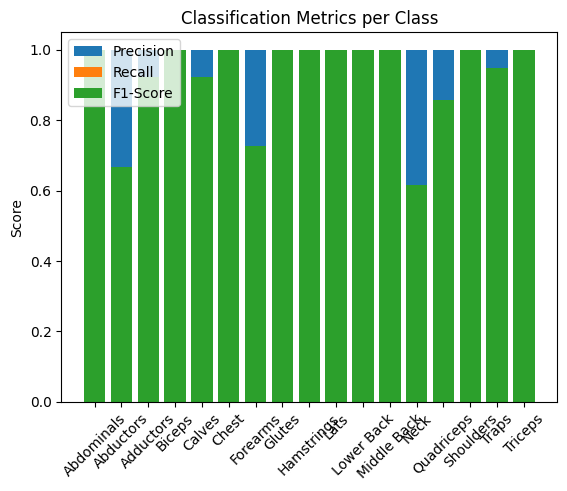

Precision per class: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall per class: [1.         0.5        0.85714286 1.         0.85714286 1.
 0.57142857 1.         1.         1.         1.         1.
 0.44444444 0.75       1.         0.9        1.        ]
F1-Score per class: [1.         0.66666667 0.92307692 1.         0.92307692 1.
 0.72727273 1.         1.         1.         1.         1.
 0.61538462 0.85714286 1.         0.94736842 1.        ]
F1-Score (Micro): 0.9320388349514563
F1-Score (Macro): 0.9211758313925497
ROC-AUC Score: 1.0


In [ ]:
def compute_metrics(y_true, y_pred, y_prob):
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_prob, average='macro', multi_class='ovr')

    # Plot the metrics
    metrics = [precision, recall, f1]
    labels = ['Precision', 'Recall', 'F1-Score']
    for i, metric in enumerate(metrics):
        plt.bar(mlb.classes_, metric, label=labels[i])
    plt.ylabel('Score')
    plt.title('Classification Metrics per Class')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    print("Precision per class:", precision)
    print("Recall per class:", recall)
    print("F1-Score per class:", f1)
    print("F1-Score (Micro):", f1_micro)
    print("F1-Score (Macro):", f1_macro)
    print("ROC-AUC Score:", roc_auc)

compute_metrics(y_test, y_pred, y_pred_probs)

In [ ]:

# Information Retrieval: TF-IDF and Cosine Similarity
def recommend_using_cosine_similarity(muscle_groups, data):
    # Build TF-IDF matrix
    tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['Muscle_Groups'].astype(str))
    
    # Query vectorization
    query_vector = tfidf_vectorizer.transform([muscle_groups])
    
    # Calculate cosine similarity
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    # Get the most similar workout plans
    top_indices = np.argsort(cosine_similarities)[::-1][:3]  # Top 3 similar workouts
    recommended_workouts = data.iloc[top_indices]
    
    return recommended_workouts

# Example usage
muscle_groups_input = "Chest, Biceps"
recommended_workouts = recommend_using_cosine_similarity(muscle_groups_input, data)
print("Recommended Workouts for", muscle_groups_input, "using Cosine Similarity:")
print(recommended_workouts)

Recommended Workouts for Chest, Biceps using Cosine Similarity:
                 Muscle_Groups  MetaBurn Pike Push-Up  Dumbbell hang snatch  \
271          [Abductors, Neck]                      0                     0   
92   [Hamstrings, Middle Back]                      0                     0   
86            [Forearms, Neck]                      0                     0   

     Pull-up - Gethin Variation  Front Plate Raise  Snatch Balance  \
271                           0                  0               0   
92                            0                  0               0   
86                            0                  0               0   

     One Half Locust  Neck-SMR  Drop Push  \
271                0         1          0   
92                 0         0          0   
86                 0         1          0   

     Medicine ball sprawl to chest press  ...  Side-lying leg lift  Push-jerk  \
271                                    0  ...                    0          

c:\Users\hp\Downloads\Flask\env\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
